Enter the image path: Comic3.jpg


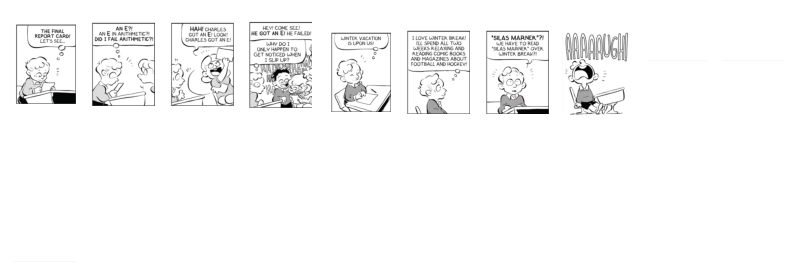

Extracted 12 sub-images for OCR processing.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_horizontal_gaps(binary_image):
    """Find long horizontal white gaps."""
    height, width = binary_image.shape
    horizontal_lines = [0]  # Start with top boundary

    for y in range(1, height - 1):
        if np.all(binary_image[y, :] == 255) and not np.all(binary_image[y - 1, :] == 255):
            horizontal_lines.append(y)

    horizontal_lines.append(height)  # Add bottom boundary
    return horizontal_lines

def find_vertical_gaps(binary_image, horizontal_lines):
    """Find long vertical white gaps between horizontal divisions."""
    height, width = binary_image.shape
    vertical_lines = [0]  # Start with left boundary

    for x in range(1, width - 1):
        for i in range(1, len(horizontal_lines)):
            y1, y2 = horizontal_lines[i - 1], horizontal_lines[i]
            if np.all(binary_image[y1:y2, x] == 255) and not np.all(binary_image[y1:y2, x - 1] == 255):
                vertical_lines.append(x)

    vertical_lines.append(width)  # Add right boundary
    return vertical_lines

def extract_sub_images(image, horizontal_lines, vertical_lines):
    """Extract meaningful sub-images for OCR processing."""
    sub_images = []

    for i in range(len(horizontal_lines) - 1):
        for j in range(len(vertical_lines) - 1):
            y1, y2 = horizontal_lines[i], horizontal_lines[i + 1]
            x1, x2 = vertical_lines[j], vertical_lines[j + 1]

            # Extract sub-image
            sub_img = image[y1:y2, x1:x2]

            # Ignore too-small segments (likely noise)
            if sub_img.shape[0] > 10 and sub_img.shape[1] > 10:
                sub_images.append(sub_img)

    return sub_images

def recursive_panel_detection(image_path):
    """Detects and extracts panel sub-images for OCR processing."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return []

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Step 1: Detect horizontal and vertical gaps
    horizontal_lines = find_horizontal_gaps(binary)
    vertical_lines = find_vertical_gaps(binary, horizontal_lines)

    # Step 2: Extract meaningful sub-images
    sub_images = extract_sub_images(image, horizontal_lines, vertical_lines)

    # Step 3: Display extracted sub-images
    plt.figure(figsize=(10, 10))
    for i, sub_img in enumerate(sub_images):
        plt.subplot(len(horizontal_lines), len(vertical_lines), i + 1)
        plt.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")

    plt.show()

    return sub_images  # Return list of sub-images for OCR

# Example usage
if __name__ == "__main__":
    image_path = input("Enter the image path: ")
    sub_images_array = recursive_panel_detection(image_path)
    print(f"Extracted {len(sub_images_array)} sub-images for OCR processing.")